#**Heart Disease Dataset**

In [34]:
#loading dataset
import pandas as pd
import numpy as np

#EDA
import math, time, random, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split, GridSearchCV

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import make_scorer

In [35]:
# imort data

df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Check informasi dataset

In [36]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Berdasarkan informasi tersebut, diketahui bahwa dataset terdiri dari 1025 baris dan 14 kolom. Kecuali kolom 'oldpeak' dengan tipe data float64, semua kolom memiliki tipe data int64. Berdasarkan info tersebut juga diketahui bahwa tidak ditemukan adanya missing values karena semua data pada kolom berjumlah 1025, sesuai dengan jumlah barisnya. Meskipun demikian, keberadaan missing values dapat dipastikan kembali.

# Cleaning data

## Missing values

In [38]:
# Menghitung Missing values
missing_values_count = df.isnull().sum()

total_missing_values = missing_values_count.sum()
print("Total missing values: ", total_missing_values)

Total missing values:  0


## Duplicate values

In [39]:
# Mencari duplicate values

total_duplicate = df.duplicated().sum()
print("Total duplcate values: ", total_duplicate, "rows")

Total duplcate values:  723 rows


In [40]:
# Menghapus data duplicate
df.drop_duplicates(inplace=True)

# Check if the duplicate values have been deleted
count_duplicate = df.duplicated().sum()
print('Total duplicate value:', count_duplicate, 'rows')

Total duplicate value: 0 rows


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Jumlah baris telah berubah menjadi 302 entries, dari yang sebelumnya 1025 entries. Hal ini menandakan bahwa data duplikat telah dihilangkan.

## Cek Distribusi Data

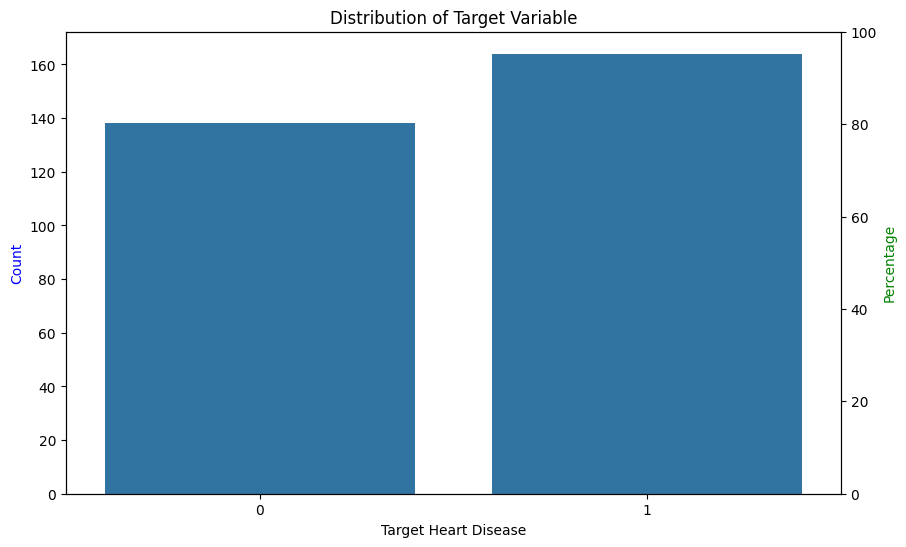

In [42]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the count distribution of the target variable
sns.countplot(x='target', data=df, ax=ax1)
ax1.set_ylabel('Count', color='b')

# Create a second y-axis to show percentages
ax2 = ax1.twinx()

# Calculate percentages
total = len(df)
target_counts = df['target'].value_counts()
percentage_target = (target_counts / total) * 100

# Plot the percentage distribution of the target variable
sns.barplot(x=target_counts.index, y=percentage_target.values, ax=ax2, alpha=0.5)
ax2.set_ylabel('Percentage', color='g')

# Set titles and labels
ax1.set_title('Distribution of Target Variable')
ax1.set_xlabel('Target Heart Disease')
ax2.set_ylim(0, 100)

# Show the plot
plt.show()

Split the dataset into train (80% of total data) and test (20% of total data)

In [43]:
# Calculate lengths for train
total_length = len(df)
train_length = int(0.8 * total_length)

# Split the DataFrame
train = df[:train_length]
test = df[train_length:]

# Optional: Reset index for each split DataFrame
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Balance the target variable (train set only)

In [44]:
from imblearn.over_sampling import SMOTE  # Install imbalanced-learn library if needed: pip install imbalanced-learn

# Separate features and target variable
X = train.drop("target", axis=1)
y = train["target"]

# Oversample using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)  # Set a random seed for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a DataFrame
train_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Print or save the balanced dataset
train_balanced.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


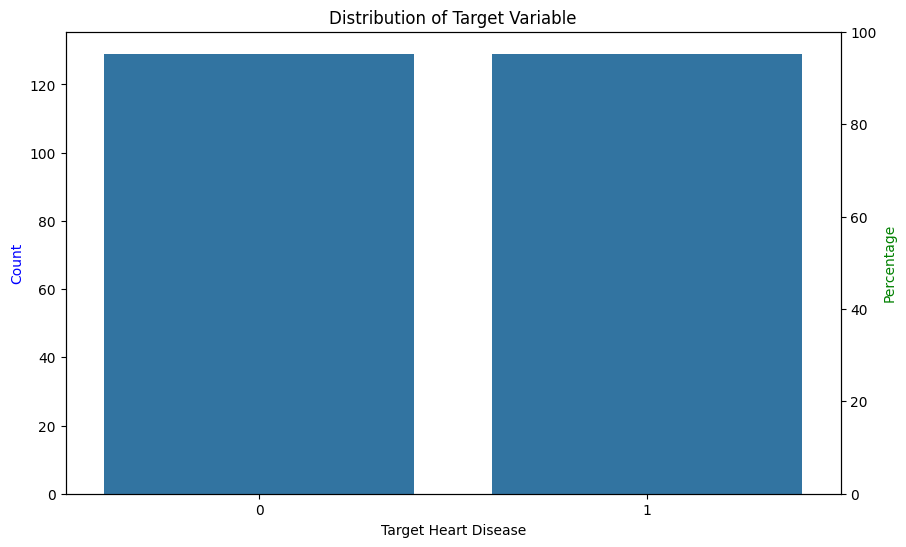

In [45]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the count distribution of the target variable
sns.countplot(x='target', data=train_balanced, ax=ax1)
ax1.set_ylabel('Count', color='b')

# Create a second y-axis to show percentages
ax2 = ax1.twinx()

# Calculate percentages
total = len(train_balanced)
target_counts = train_balanced['target'].value_counts()
percentage_target = (target_counts / total) * 100

# Plot the percentage distribution of the target variable
sns.barplot(x=target_counts.index, y=percentage_target.values, ax=ax2, alpha=0.5)
ax2.set_ylabel('Percentage', color='g')

# Set titles and labels
ax1.set_title('Distribution of Target Variable')
ax1.set_xlabel('Target Heart Disease')
ax2.set_ylim(0, 100)

# Show the plot
plt.show()

Memeriksa distribusi data dan melakukan balancing data sebelum membuat model machine learning diharapkan dapat meningkatkan performa model dan menghindari bias. Hal ini karena distribusi yang tidak seimbang dapat menyebabkan model menjadi bias terhadap kelas yang dominan.

## Feature Scalling

Tujuan dari melakukan feature scaling, khususnya menggunakan metode seperti StandardScaler, terhadap data train dan data test sebelum membuat model machine learning adalah untuk memastikan bahwa variabel-variabel dalam dataset memiliki skala yang serupa atau setara. Perbedaan skala dalam machine learning dapat menyebabkan masalah saat melatih model, karena fitur dengan skala yang lebih besar mungkin mendominasi fitur lainnya. Oleh karena itu, feature scalling dilakuan untuk memastikan bahwa semua fitur memberikan kontribusi yang sama pada model, sehingga diharapkan mampu meningkatkan performa model, dimana feature scaling membantu algoritma bekerja lebih optimal dengan menyamakan skala semua fitur, membantu proses training model berjalan lebih cepat, dan kemungkinan untuk menghindari bias dalam model.



In [46]:
# DATA TRAIN

# Separate features and target variable
X = train_balanced.drop("target", axis=1)
y = train_balanced["target"]

# Identify numeric features (assuming others are categorical)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a StandardScaler (or MinMaxScaler) object
scaler = StandardScaler()  # For standardization (z-scores)

# Scale only the numeric features
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Combine scaled features with non-numeric features (if any)
train_scaled = pd.concat([X_scaled, X.drop(numeric_cols, axis=1)], axis=1)

# Combine scaled features with the target variable
train_scaled = pd.concat([train_scaled, y], axis=1)

# Print or save the scaled dataset
train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.223570,0.682575,-0.895046,-0.402931,-0.683556,-0.421998,0.963942,0.802015,-0.750757,-0.071331,1.009840,1.338019,1.107320,0
1,-0.110912,0.682575,-0.895046,0.424746,-0.852320,2.369680,-0.949112,0.261863,1.331989,1.720308,-2.148206,-0.716796,1.107320,0
2,1.804279,0.682575,-0.895046,0.700638,-1.396112,-0.421998,0.963942,-0.984643,1.331989,1.293727,-2.148206,-0.716796,1.107320,0
3,0.790355,0.682575,-0.895046,0.866174,-0.852320,-0.421998,0.963942,0.511164,-0.750757,-0.924493,1.009840,0.310612,1.107320,0
4,0.903013,-1.465040,-0.895046,0.314389,0.854064,2.369680,0.963942,-1.774096,-0.750757,0.696514,-0.569183,2.365427,-0.479839,0


In [47]:
# DATA TEST

# Separate features and target variable
X = test.drop("target", axis=1)
y = test["target"]

# Identify numeric features (assuming others are categorical)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a StandardScaler (or MinMaxScaler) object
scaler = StandardScaler()  # For standardization (z-scores)

# Scale only the numeric features
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Combine scaled features with non-numeric features (if any)
test_scaled = pd.concat([X_scaled, X.drop(numeric_cols, axis=1)], axis=1)

# Combine scaled features with the target variable
test_scaled = pd.concat([test_scaled, y], axis=1)

# Print or save the scaled dataset
test_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.304717,0.777987,-0.029781,0.494184,-0.477019,-0.388514,0.782014,0.774875,2.020726,-0.927057,1.011779,-0.717874,-0.662723,1
1,0.867980,-1.285369,-0.938107,-0.086649,1.404724,-0.388514,0.782014,-1.319248,-0.494872,0.924022,-0.702624,1.186053,-0.662723,1
2,0.192064,0.777987,-0.938107,0.842683,-0.545863,-0.388514,0.782014,-2.166870,-0.494872,0.924022,-0.702624,0.234089,1.174827,0
3,0.304717,0.777987,-0.938107,-1.248313,-0.063954,-0.388514,-1.126100,-0.322047,2.020726,0.183591,-0.702624,0.234089,1.174827,0
4,-2.398950,0.777987,-0.938107,-0.318982,0.922814,-0.388514,-1.126100,0.375994,2.020726,-0.927057,1.011779,-0.717874,1.174827,0


# Model Machine Learning

*   XGBoost
*   Random Forest



## XGBoost

Dalam dataset ini, variabel yang akan digunakan sebagai target adalah 'target' yang memiliki nilai 0 atau 1 yang menunjukkan keberadaan atau ketiadaan penyakit jantung. Ada beberapa alasan mengapa XGBoost merupakan pilihan terbaik untuk model machine learning pada dataset ini:


*   XGBoost adalah model yang juga cocok digunakan untuk masalah klasifikasi binary, karena mampu menangani banyak variabel dan memiliki kemampuan untuk mengidentifikasi variabel yang paling penting dalam mempengaruhi prediksi. Oleh karena itu, diharapkan model XGBoost mampu memberikan akurasi prediksi yang baik dan mampu mengidentifikasi fitur-fitur yang paling penting dalam memprediksi keberadaan penyakit jantung.

*    Performa Tinggi: XGBoost terkenal dengan akurasinya yang tinggi dalam berbagai macam tugas machine learning, termasuk klasifikasi. Dalam dataset penyakit jantung, XGBoost terbukti mampu mencapai akurasi yang tinggi dalam memprediksi apakah seorang pasien memiliki penyakit jantung atau tidak

*   Kemampuan Generalisasi yang Baik: XGBoost mampu mempelajari pola-pola kompleks dalam data dan menghasilkan model yang dapat digeneralisasikan dengan baik ke data baru. Hal ini penting untuk memastikan bahwa model yang dihasilkan dapat digunakan secara akurat untuk memprediksi penyakit jantung pada pasien baru.

*   XGBoost mampu menangani data yang tidak seimbang dengan baik, yang merupakan hal yang umum terjadi dalam dataset medis.

*   Fleksibilitas dalam Hyperparameter Tuning: XGBoost memiliki banyak hyperparameter yang dapat disesuaikan, yang memungkinkan penyesuaian model yang mendalam dan tuning yang lebih baik untuk dataset tertentu. Ini termasuk parameter seperti learning rate, jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), dan banyak lagi


*   Kecepatan dan Efisiensi: XGBoost dirancang dengan fokus pada kecepatan dan efisiensi, dan sering kali memiliki kinerja yang lebih cepat daripada algoritma boosting lainnya seperti Gradient Boosting Machine (GBM).




In [48]:
X_train = train_scaled.drop(["target"], axis=1)
y_train = train_scaled["target"]

X_test = test_scaled.drop(["target"], axis=1)
y_test = test_scaled["target"]

# Create an XGBoost classifier with default parameters
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_pred_train)
test_auc = roc_auc_score(y_test, y_pred_test)

# Print AUC scores
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)

Train AUC: 1.0
Test AUC: 0.6505494505494506


**Plot the AUC**

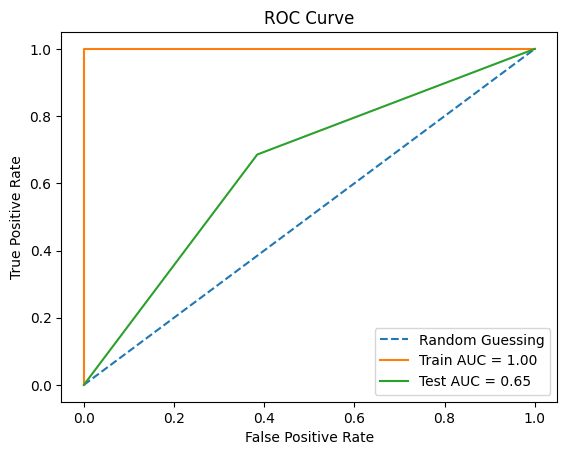

In [49]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Kurva ROC (Receiver Operating Characteristic Curve) adalah sebuah grafik yang menggambarkan performa model klasifikasi biner. Kurva ini menampilkan True Positive Rate (TPR) pada sumbu y melawan False Positive Rate (FPR) pada sumbu x. TPR adalah proporsi kasus positif yang teridentifikasi dengan benar oleh model, sedangkan FPR adalah proporsi kasus negatif yang salah diklasifikasikan sebagai positif oleh model. Kurva ROC yang ideal akan mengikuti sudut kiri atas grafik, dimana ia memiliki TPR 1 dan FPR 0. Dimana hal tersebut menunjukkan bahwa model mengklasifikasikan semua kasus dengan sempurna. Jika luas area di bawah kurva ROC sekitar 0,5, maka model tersebut tidak memiliki kemampuan prediksi yang lebih baik dibandingkan model yang memprediksi secara acak. Namun jika AUC ROC lebih besar dari 0,5, maka semakin tinggi AUC ROC maka performa model dalam memprediksi kelas target akan semakin baik. Semakin mendekati 1, maka semakin tinggi kemampuan model dalam memprediksi kelas sasaran secara akurat.

AUC merupakan singkatan dari Area Under the Curve. Ini adalah ukuran seberapa baik model dapat membedakan antara kasus positif dan negatif. Berdasarkan Kurva ROC di atas, AUC untuk data training adalah 1.0, yang berarti model mengklasifikasikan data training dengan sempurna.  Namun, AUC untuk data testing adalah 0.65, yang artinya hanya sedikit (65%) lebih baik dari random guessing dalam membedakan TP dan FP. Hal ini menunjukkan bahwa model terlalu menghafal data training (overfitting) dan tidak dapat digeneralisasikan dengan baik ke data baru yang belum pernah dilihatnya.

**Feature Importance**

Feature importance perlu dilakukan karena memberikan wawasan yang berharga tentang kontribusi relatif dari setiap fitur terhadap prediksi model. Hal ini membantu kita memahami mana fitur-fitur yang paling penting atau yang paling berpengaruh dalam membuat prediksi, serta memberikan pemahaman yang lebih dalam tentang hubungan antara fitur-fitur tersebut dan target yang diprediksi. Sehingga kita dapat memilih fitur-fitur yang paling penting untuk dimasukkan ke dalam model, sehingga membantu mengurangi dimensi data dan meningkatkan efisiensi komputasi tanpa mengorbankan kinerja model.


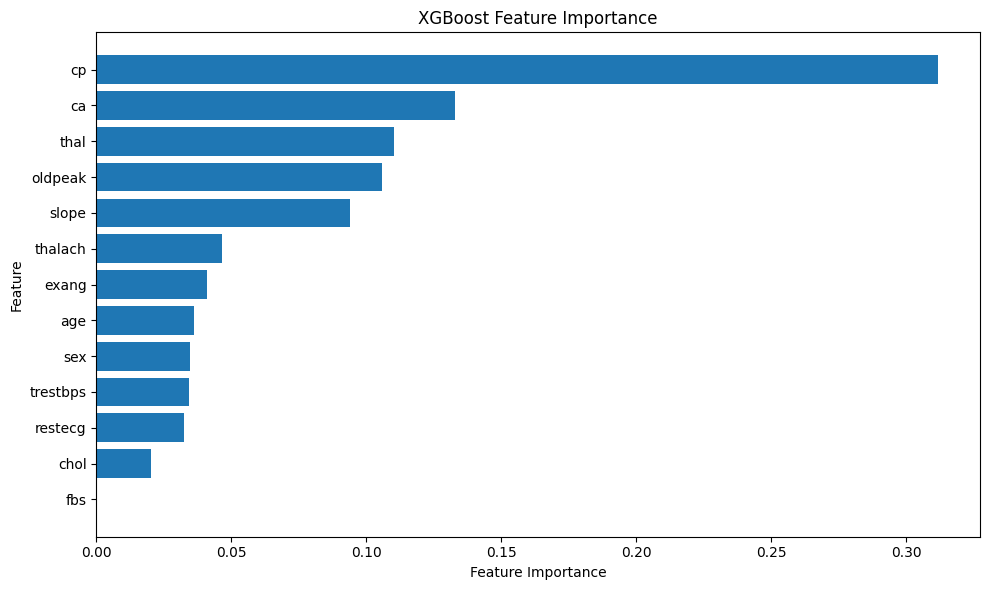

In [50]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

Berdasarkan feature importance di atas, dapat diketahu bahwa fitur cp (jenis penyakit) dan ca (jumlah vessel utama (0-3) diwarnai oleh flourosopy) memiliki pengaruh yang paling signifikan terhadap variabel target.

**Cross-Validation**

Cross-validation adalah teknik penting dalam machine learning yang digunakan untuk mengevaluasi kinerja model secara lebih akurat dan andal.

In [51]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Pisahkan feature dataset kita
X_train = train_scaled.drop(["target"], axis=1)
y_train = train_scaled["target"]

# Buat XGBoost classifier dgn default parameters
model = XGBClassifier(random_state=42)

# Lakukan cross-validation dan hitung AUC scores
cv_auc_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Print AUC scores untuk stiap fold
print("Cross-Validation AUC scores:", cv_auc_scores)

# Hitung mean and standard deviasi dari AUC scores
mean_auc = np.mean(cv_auc_scores)
std_auc = np.std(cv_auc_scores)

# Print mean and standard deviasi dari AUC score
print("Mean AUC:", mean_auc)
print("Standard Deviation of AUC:", std_auc)

Cross-Validation AUC scores: [0.87278107 0.9112426  0.94970414 0.93692308 0.92153846]
Mean AUC: 0.9184378698224853
Standard Deviation of AUC: 0.02632569848030958


**Cross-Validation AUC scores**: nilai AUC yang dihitung untuk setiap fold dalam cross-validation. Setiap nilai mewakili kinerja model pada subset data uji tertentu. Misalnya, nilai pertama adalah AUC dari fold pertama, nilai kedua adalah AUC dari fold kedua, dan seterusnya.

**Mean AUC**: nilai rata-rata dari semua nilai AUC yang dihasilkan oleh cross-validation. Ini memberikan gambaran umum tentang kinerja model secara keseluruhan. Dalam konteks ini, rata-rata AUC sebesar 0.9184 menunjukkan bahwa secara umum, model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.

**Standard Deviation of AUC**: Ini adalah ukuran sebaran atau variasi dari nilai AUC di seluruh fold cross-validation. Ini menggambarkan seberapa konsisten kinerja model di berbagai subset data uji. Semakin kecil nilai standar deviasi, semakin konsisten kinerja modelnya. Dalam kasus ini, standar deviasi sebesar 0.0263 menunjukkan bahwa kinerja model relatif stabil di seluruh fold cross-validation.

**Learning curve**

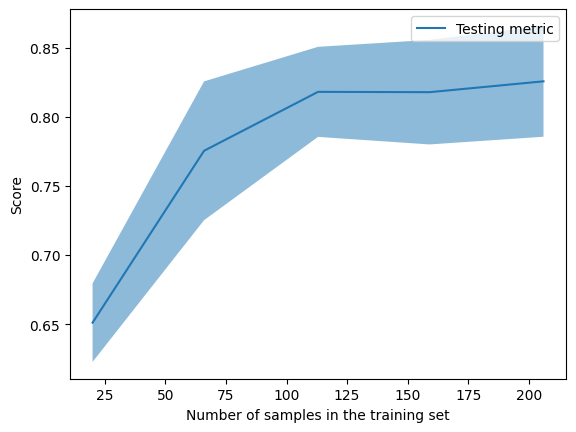

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from xgboost import XGBClassifier

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

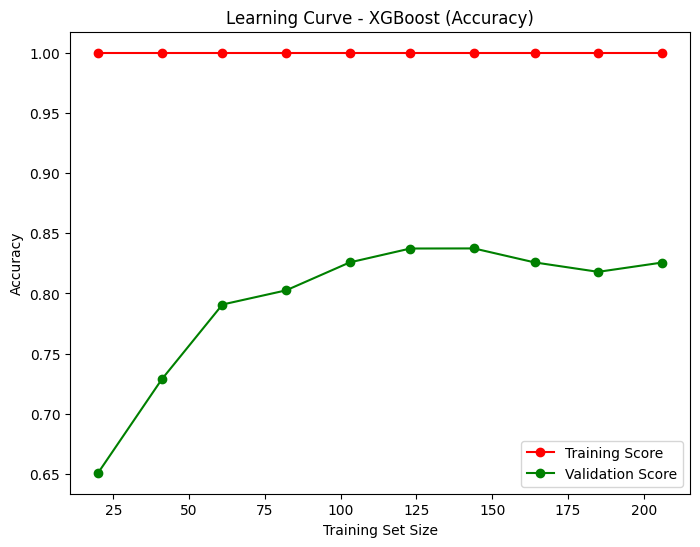

In [53]:
# Membuat learning curve dengan scoring accuracy
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Menghitung rata-rata skor pada setiap ukuran data latih
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Visualisasi learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve - XGBoost (Accuracy)')
plt.show()



*   Nilai training score yang selalu 1.0 menunjukkan bahwa model  memprediksi semua data training dengan benar. Hal ini menunjukkan bahwa model Anda telah mempelajari pola-pola dalam data training dengan sempurna. Meskipun memiliki akurasi 100% pada data training, tidak ada jaminan bahwa model tersebut akan berkinerja baik pada data baru yang belum pernah dilihatnya. Hal ini karena model mungkin telah terlalu fokus pada detail kecil dalam data training dan tidak dapat menangkap pola yang lebih umum yang berlaku untuk data baru.

*   Nilai training score yang selalu 1.0 serta nilai training score selalu berada di atas validation score dengan gap yang jauh merupakan indikasi overfitting yang parah. Hal ini mungkin disebabkan karena jumlah data yang terlalu sedikit atau kurang bervariasi




**Hyperparameter tuning**

Hyperparameter Tuning dilakukan untuk mencari best parameter pada masing-masing pemodelan

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definisikan parameter gridnya
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1, 2],
    'reg_lambda': [0, 0.1, 0.5, 1, 2]
}

# Buat model XGBoost classifier nya
model = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
                                   scoring='roc_auc', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate AUC score on the testing set
test_auc = roc_auc_score(y_test, y_pred_test)
print("Test AUC with best model:", test_auc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0}
Test AUC with best model: 0.6697802197802198




*   **Fitting 5 folds for each of 100 candidates, totalling 500 fits**: Ini menunjukkan bahwa proses tuning dilakukan dengan menggunakan cross-validation dengan 5 lipatan (5-fold cross-validation) dan dicoba sebanyak 100 kombinasi parameter yang berbeda.

*   **reg_lambda**: Regularisasi L2 (0.5).

*   **reg_alpha**: Regularisasi L1 (1).

*   **n_estimators**: Jumlah pohon yang digunakan dalam model (100).

*   **max_depth**: Kedalaman maksimum dari setiap pohon (3).

*   **learning_rate**: Tingkat pembelajaran (0.1)
*   **gamma**: Minimum loss reduction yang diperlukan untuk melakukan pemisahan tambahan pada simpul pohon (0)

*   **AUC (Area Under the Curve)**: mengukur kualitas keseluruhan dari model klasifikasi, dengan nilai yang lebih tinggi menunjukkan performa yang lebih baik. Dalam konteks ini, AUC sebesar 0.6698 menunjukkan bahwa model yang dihasilkan memiliki kualitas yang cukup baik dalam membedakan antara kelas positif dan negatif pada data test.

**Train using the best parameters**

In [55]:
from xgboost import XGBClassifier

# Use the best parameters obtained from randomized search
best_params = {'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.001, 'gamma': 0}

# Create an XGBoost classifier with the best parameters
best_model = XGBClassifier(**best_params, random_state=42)

# Train the model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate AUC score on the testing set
test_auc = roc_auc_score(y_test, y_pred_test)
print("Test AUC with best model:", test_auc)

Test AUC with best model: 0.6983516483516483


**ROC Curve**

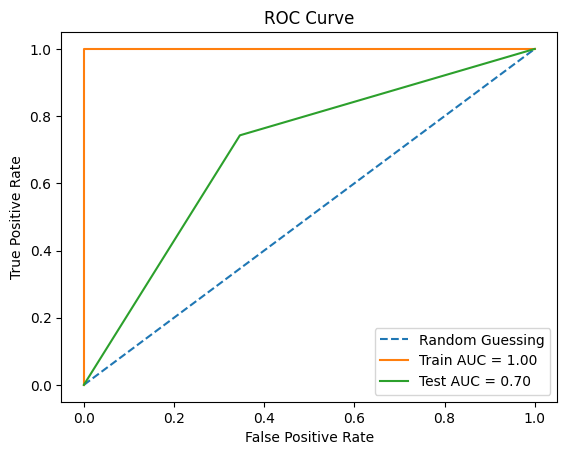

In [56]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Berdasarkan Kurva ROC di atas, AUC untuk data training adalah 1.0, yang berarti model mengklasifikasikan data training dengan sempurna.  Namun, AUC untuk data testing adalah 0.70, yang artinya hanya sedikit (70%) lebih baik dari random guessing dalam membedakan TP dan FP. Hal ini menunjukkan bahwa model terlalu masih mengalami overfitting Meskipun demikian, AUC mengalami peningkatan sebesar 5% setelah dilakukan hyperparameter tuning

**Accuracy, Precision, Recall, F1 Score, and AUC**

In [57]:
# DATA TRAIN

# Create a dictionary with metric names and corresponding values
XGb_dict = {
    'model': ['XGBoost'],
    'accuracy': accuracy_score(y_train, y_pred_train),
    'precision': precision_score(y_train, y_pred_train),
    'recall': recall_score(y_train, y_pred_train),
    'F1': f1_score(y_train, y_pred_train),
    'AUC': roc_auc_score(y_train, y_pred_train)
}

# Convert the dictionary to a Pandas DataFrame
XGb_results = pd.DataFrame(XGb_dict)

# Print the table
XGb_results

,model,accuracy,precision,recall,F1,AUC
0,XGBoost,1.0,1.0,1.0,1.0,1.0


In [58]:
XGb_dict = {
    'model': ['XGBoost'],
    'accuracy': accuracy_score(y_test, y_pred_test),
    'precision': precision_score(y_test, y_pred_test),
    'recall': recall_score(y_test, y_pred_test),
    'F1': f1_score(y_test, y_pred_test),
    'AUC': roc_auc_score(y_test, y_pred_test)
}

# Convert the dictionary to a Pandas DataFrame
XGb_results = pd.DataFrame(XGb_dict)

# Print the table
XGb_results

,model,accuracy,precision,recall,F1,AUC
0,XGBoost,0.704918,0.742857,0.742857,0.742857,0.698352


Berdasarkan laporan klasifikasi di atas dapat diketahui:

*   **Presisi** : Model memprediksi dengan benar 100% untuk penyakit jantung (positif) pada data train. Sementara pada data test model memprediksi penyakit jantung dengan benar sebesar 74%.

*   **Akurasi** : Model memprediksi semua contoh pada data train dengan 100% benar dan hanya memprediksi 70% contoh pada data test dengan benar.

*   **Recall**: Model mengidentifikasi semua penyakit jantung) pada data train. Namun hanya dapat mengidentifikasi sebesar 74% pada data test.

*   **F1-score** : Pada data train Keseimbangan antara presisi dan recall menunjukkan performa model yang sempurna dalam mengklasifikasikan data train. Sementara pada data test keseimbangan antara presisi dan recall menunjukkan performa model sebesar 74%, dan masih dapat dikatakan cukup baik dalam mengklasifikasikan data test.


Hasil analisis tersebut menunjukkan bahwa model XGBoost memiliki performa yang sangat baik pada data train, dengan mencapai nilai maksimal (1.0) untuk semua metrik evaluasi: akurasi, presisi, recall, F1 score, dan AUC. Hal ini menunjukkan bahwa model tersebut mampu melakukan prediksi dengan sempurna pada data yang digunakan untuk melatihnya. Namun, ketika model diuji pada data test yang tidak pernah dilihat sebelumnya, kinerjanya sedikit menurun. Meskipun masih memiliki performa yang cukup baik, terlihat adanya penurunan nilai untuk semua metrik evaluasi dibandingkan dengan data train. Hal ini menunjukkan bahwa model memiliki kecenderungan untuk overfitting, yaitu model terlalu "menghafal" data train dan tidak mampu menggeneralisasi dengan baik pada data baru. Selain itu, nilai metrik evaluasi yang sempurna pada data train dapat disebabkan karena kurangnya variasi pada data.



**Confusion Matrix**

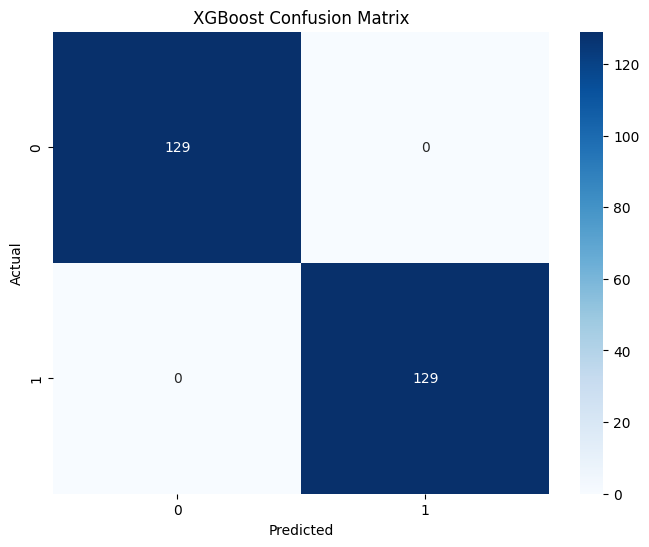

In [59]:
# TRAIN

# Compute values for confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Create display of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Berdasarkan hasil analisis confusion matrix pada data train tersebut, diketahui bahwa dari 129 pasien yang tidak terkena heart disease, sebanyak 129 pasien (total pasien) diprediksi tidak terkena heart disease (TN) dan 0 pasien diprediksi terkena heart disease (FP).
Selanjutnya, dari 129 Pasien yang terkena heart disease, seluruh pasien diprediksi terkena heart disease (TP) dan tidak ada pasien yang diprediksi tidak terkena heart disease (FN). Hal ini mendukung hasil evaluation matrix, dimana model dapat memprediksi data training dengan benar 100%.

Dimana:

*   TN (True Negatif): Kasus dimana pasien diprediksi tidak terkena heart disease dan sebenarnya pasien tersebut tidak terkena heart disease.
*   FP (False Positif): Kasus dimana pasien diprediksi terkena heart disease, tetapi pada faktanya pasien tersebut tidak terkena heart disease.
*   FN (False Negatif): Kasus dimana pasien diprediksi tidak terkena heart disease, tetapi pada faktanya pasien tersebut terkena heart disease.
*   TP (True Positif): Kasus dimana pasien diprediksi terkena heart disease dan sebenarnya pasien tersebut terkena heart disease.

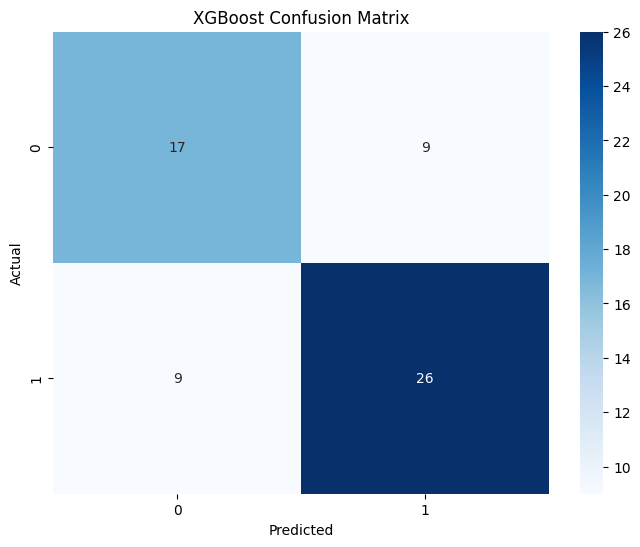

In [60]:
# TEST

# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create display of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Berdasarkan hasil analisis confusion matrix pada data test tersebut, diketahui bahwa dari 26 pasien yang tidak terkena heart disease, sebanyak 17 pasien diprediksi tidak terkena heart disease (TN) dan sisanya yaitu 9 pasien diprediksi terkena heart disease (FP).
Selanjutnya, dari 35 Pasien yang terkena heart disease, sebanyak 26 pasien diprediksi terkena heart disease (TP) dan 9 pasien  diprediksi tidak terkena heart disease (FN)


## Random Forest

Random Forest adalah pemodelan dengan algoritma yang menggabungkan beberapa decision tree untuk meningkatkan akurasi dan mengurangi variasi model. Pemodelan ini juga dapat menangani hubungan non-linier antara fitur dan variabel target serta dapat menyelesaikan atau menangani data yang hilang. Selain itu, model ini cocok digunakan untuk masalah klasifikasi binary seperti ini, karena mampu menangani banyak variabel dan memiliki kemampuan untuk mengidentifikasi variabel yang paling penting dalam mempengaruhi prediksi. Selain itu, beberapa alasan mengapa Random Forest dipilih:

*   Kemampuan menangani data kompleks: Dataset penyakit jantung memiliki banyak fitur dan kemungkinan interaksi yang kompleks.


*   Fleksibilitas dalam menangani berbagai jenis fitur: Random Forest dapat menangani baik fitur kategorikal maupun numerik tanpa perlu melakukan transformasi tambahan.

*   Performa yang baik dalam klasifikasi dan regresi: Random Forest secara umum memberikan performa yang baik dalam berbagai tugas seperti klasifikasi dan regresi, sehingga cocok digunakan untuk dataset yang tidak hanya memiliki variabel target biner tetapi juga kontinu.




In [61]:
# Create an RandomForest classifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on training and testing sets
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_pred_train)
test_auc = roc_auc_score(y_test, y_pred_test)

# Print AUC scores
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)

Train AUC: 1.0
Test AUC: 0.7417582417582418


**Plot the AUC**

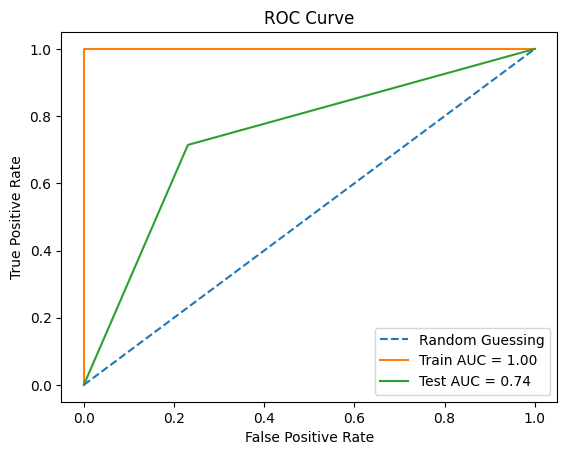

In [62]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Berdasarkan Kurva ROC di atas, AUC untuk data training adalah 1.0, yang berarti model mengklasifikasikan data training dengan sempurna.  Namun, AUC untuk data testing adalah 0.74, yang artinya hanya sedikit (74%) lebih baik dari random guessing dalam membedakan TP dan FP. Hal ini menunjukkan bahwa model terlalu menghafal data training (overfitting) dan tidak dapat digeneralisasikan dengan baik ke data baru yang belum pernah dilihatnya. Overfiting ini kemungkinan disebabkan karena kurangnya variasi data pada set data training

**Feature Importance**

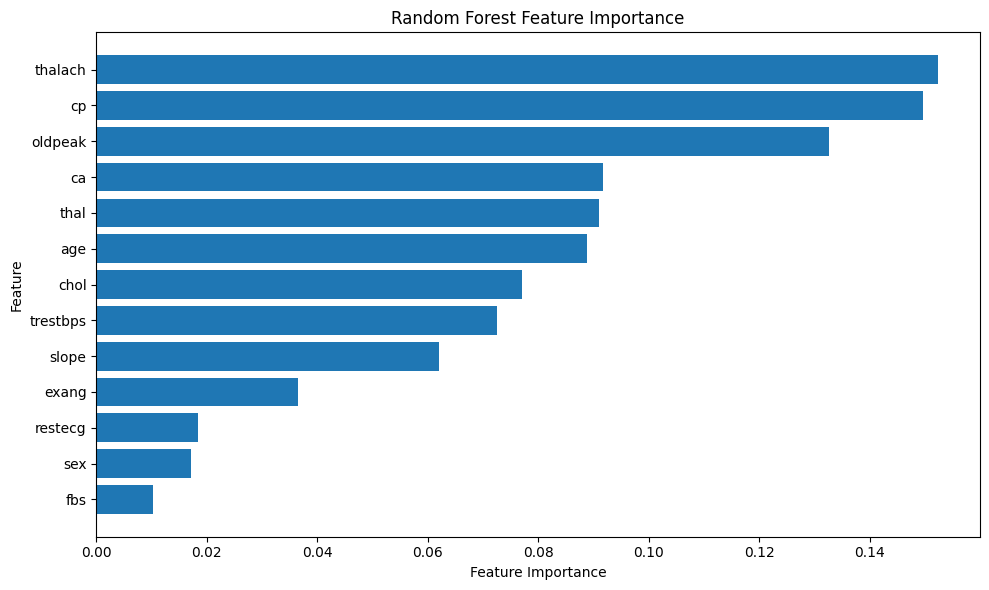

In [63]:
# Feature importance visualization
feature_importance = rf.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

Berdasarkan feature importance di atas, dalam model Random Forest, fitur yang paling berpengaruh terhadap variabel target adalah thalach (tekanan darah maksimal yang dapat dicapai), cp (jenis chest pain), dan oldpeak (Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat)

**Cross Validation**

In [64]:
# Pisahkan feature dataset kita
X_train = train_scaled.drop(["target"], axis=1)
y_train = train_scaled["target"]

# Buat Random Forest classifier dgn default parameters
rf = RandomForestClassifier(random_state=42)

# Lakukan cross-validation dan hitung AUC scores
cv_auc_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')

# Print AUC scores untuk stiap fold
print("Cross-Validation AUC scores:", cv_auc_scores)

# Hitung mean and standard deviasi dari AUC scores
mean_auc = np.mean(cv_auc_scores)
std_auc = np.std(cv_auc_scores)

# Print mean and standard deviasi dari AUC score
print("Mean AUC:", mean_auc)
print("Standard Deviation of AUC:", std_auc)

Cross-Validation AUC scores: [0.88609467 0.90236686 0.93491124 0.94615385 0.88538462]
Mean AUC: 0.9109822485207101
Standard Deviation of AUC: 0.025133615139741564


**Cross-Validation AUC scores**: nilai AUC yang dihitung untuk setiap fold dalam cross-validation. Setiap nilai mewakili kinerja model pada subset data uji tertentu. Misalnya, nilai pertama adalah AUC dari fold pertama, nilai kedua adalah AUC dari fold kedua, dan seterusnya.

**Mean AUC**: nilai rata-rata dari semua nilai AUC yang dihasilkan oleh cross-validation. Ini memberikan gambaran umum tentang kinerja model secara keseluruhan. Dalam konteks ini, rata-rata AUC sebesar 0.91 menunjukkan bahwa secara umum, model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.

**Standard Deviation of AUC**: Ini adalah ukuran sebaran atau variasi dari nilai AUC di seluruh fold cross-validation. Ini menggambarkan seberapa konsisten kinerja model di berbagai subset data uji. Semakin kecil nilai standar deviasi, semakin konsisten kinerja modelnya. Dalam kasus ini, standar deviasi sebesar 0.025 menunjukkan bahwa kinerja model relatif stabil di seluruh fold cross-validation.

**Learning curve**

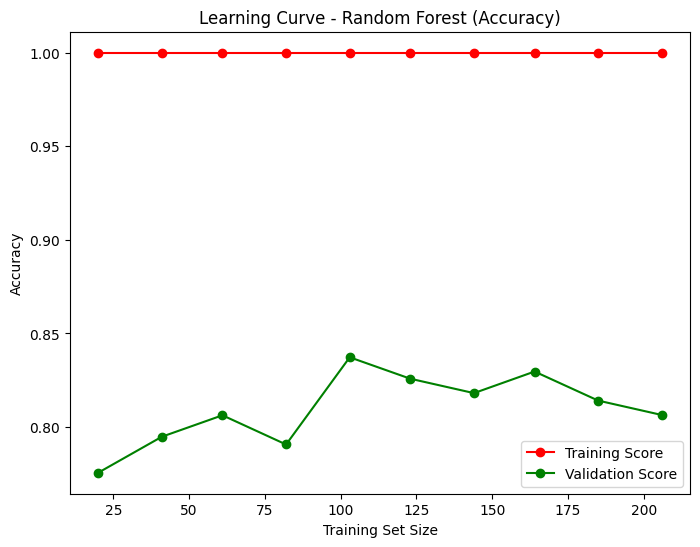

In [65]:
# Membuat learning curve dengan scoring accuracy
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Menghitung rata-rata skor pada setiap ukuran data latih
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Visualisasi learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve - Random Forest (Accuracy)')
plt.show()

*   Nilai training score yang selalu 1.0 menunjukkan bahwa model  memprediksi semua data training dengan benar. Hal ini menunjukkan bahwa model Anda telah mempelajari pola-pola dalam data training dengan sempurna. Meskipun memiliki akurasi 100% pada data training, tidak ada jaminan bahwa model tersebut akan berkinerja baik pada data baru yang belum pernah dilihatnya. Hal ini karena model mungkin telah terlalu fokus pada detail kecil dalam data training dan tidak dapat menangkap pola yang lebih umum yang berlaku untuk data baru.

*   Nilai training score yang selalu 1.0 serta nilai training score selalu berada di atas validation score dengan gap yang jauh merupakan indikasi overfitting yang parah. Hal ini mungkin disebabkan karena jumlah data yang terlalu sedikit atau kurang bervariasi

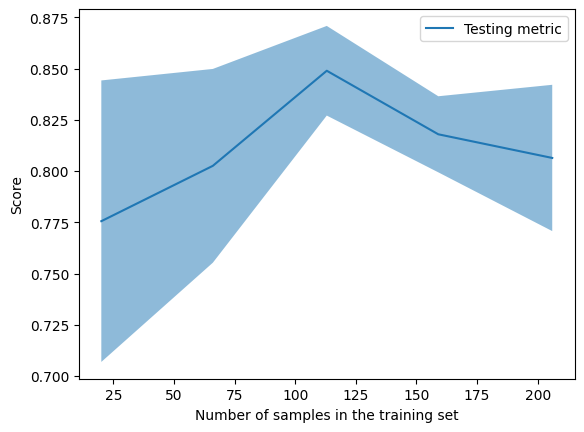

In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from xgboost import XGBClassifier

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

**Hyperparameter tuning**

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisikan parameter gridnya
param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf' : [1, 2, 4, 6, 8],
    'min_samples_split' : [2, 3, 5, 8, 10],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# Buat model Random Forest classifier nya
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100,
                                   scoring='roc_auc', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf = random_search.best_estimator_

# Make predictions on the testing set
y_pred_test = best_rf.predict(X_test)

# Calculate AUC score on the testing set
test_auc = roc_auc_score(y_test, y_pred_test)
print("Test AUC with best model:", test_auc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
Test AUC with best model: 0.7467032967032967




*   **Fitting 5 folds for each of 100 candidates, totalling 500 fits**: Ini menunjukkan bahwa proses tuning dilakukan dengan menggunakan cross-validation dengan 5 lipatan (5-fold cross-validation) dan dicoba sebanyak 100 kombinasi parameter yang berbeda.

*   **n_estimators**: jumlah pohon yang akan ditanam dalam model Random Forest.

*   **min_samples_split**: jumlah minimum sampel yang diperlukan untuk membagi node dalam pohon keputusan. Nilai 8 menunjukkan bahwa sebuah node hanya dapat dibagi jika memiliki minimal 8 sampel.

*   **min_samples_leaf**: jumlah minimum sampel yang diperlukan untuk menjadi node daun dalam pohon keputusan. Nilai 1 berarti node daun dapat memiliki hanya satu sampel.

*   **max_features**: menentukan jumlah fitur yang perlu dipertimbangkan ketika membagi node dalam pohon keputusan. "sqrt" menunjukkan bahwa akar kuadrat dari jumlah total fitur akan digunakan pada setiap pembagian.

*   **max_depth**: kedalaman maksimum pohon keputusan dalam model Random Forest. Nilai 3 menunjukkan bahwa pohon tidak akan tumbuh lebih dalam dari 3 level.

*   **criterion**:  fungsi yang digunakan untuk mengukur kualitas pembagian dalam pohon keputusan. "entropy" adalah ukuran ketidakmurnian, dan Random Forest akan memilih pembagian yang mengarah ke node anak yang paling murni. Entropy umumnya lebih disukai untuk masalah klasifikasi multi-kelas (lebih dari dua kelas). Sementara 'Gini' impurity mengukur probabilitas salah klasifikasi (misclassification) sembarang data point jika dipilih secara acak dari kumpulan data tersebut. Gini impurity sering digunakan untuk masalah klasifikasi biner (dua kelas). Ini karena Gini impurity secara intuitif mengukur kemungkinan salah klasifikasi antar dua kelas yang ada.

*   **Bootstrap**: menunjukkan bahwa model akan menggunakan bootstrapping selama pelatihan. Bootstrapping melibatkan pembuatan sampel acak dengan penggantian dari data asli, yang membantu mengurangi varians dan meningkatkan kinerja model.


*   **AUC** sebesar 0.7368 menunjukkan kinerja yang baik dalam membedakan antara pasien sehat dan penderita penyakit.




**Train with the best parameter**

In [68]:
# Use the best parameters obtained from randomized search
best_params = {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True }

# Create an XGBoost classifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the entire training set
best_rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = best_rf.predict(X_test)

# Calculate AUC score on the testing set
test_auc = roc_auc_score(y_test, y_pred_test)
print("Test AUC with best model:", test_auc)

Test AUC with best model: 0.756043956043956


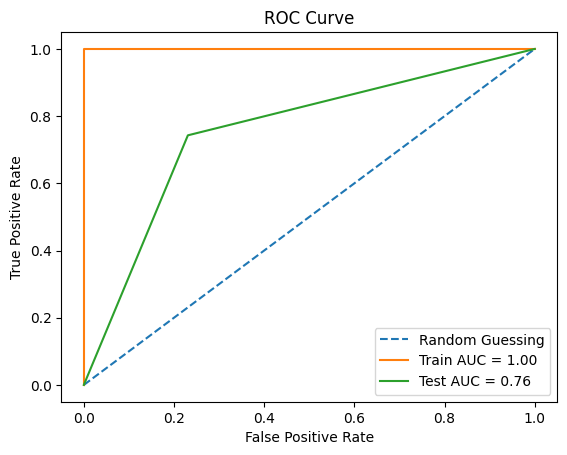

In [69]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Berdasarkan Kurva ROC di atas, AUC untuk data training adalah 1.0, yang berarti model mengklasifikasikan data training dengan sempurna.  Namun, AUC untuk data testing adalah 0.76, yang artinya hanya sedikit (76%) lebih baik dari random guessing dalam membedakan TP dan FP. Selain itu, dapat diketahui juga bahwa nilai AUC mengalami peningkatan setelah dilakukan hyperparameter tunning meskipun tidak signifikan. Akan tetapi overfiting masih terjadi.

**Accuracy, Precision, Recall, F1 Score, and AUC**

In [70]:
# DATA TRAIN

# Create a dictionary with metric names and corresponding values
rf_dict = {
    'model': ['Random Forest'],
    'accuracy': accuracy_score(y_train, y_pred_train),
    'precision': precision_score(y_train, y_pred_train),
    'recall': recall_score(y_train, y_pred_train),
    'F1': f1_score(y_train, y_pred_train),
    'AUC': roc_auc_score(y_train, y_pred_train)
}

# Convert the dictionary to a Pandas DataFrame
rf_results = pd.DataFrame(rf_dict)

# Print the table
rf_results

,model,accuracy,precision,recall,F1,AUC
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [71]:
# DATA TEST

# Create a dictionary with metric names and corresponding values
rf_dict = {
    'model': ['Random Forest'],
    'accuracy': accuracy_score(y_test, y_pred_test),
    'precision': precision_score(y_test, y_pred_test),
    'recall': recall_score(y_test, y_pred_test),
    'F1': f1_score(y_test, y_pred_test),
    'AUC': roc_auc_score(y_test, y_pred_test)
}

# Convert the dictionary to a Pandas DataFrame
rf_results = pd.DataFrame(rf_dict)

# Print the table
rf_results

,model,accuracy,precision,recall,F1,AUC
0,Random Forest,0.754098,0.8125,0.742857,0.776119,0.756044


Berdasarkan laporan klasifikasi di atas dapat diketahui:

*   **Presisi** : Model memprediksi dengan benar 100% untuk penyakit jantung (positif) pada data train. Sementara pada data test model memprediksi penyakit jantung dengan benar sebesar 81%.

*   **Akurasi** : Model memprediksi semua contoh pada data train dengan 100% benar dan hanya memprediksi 75% contoh pada data test dengan benar.

*   **Recall**: Model mengidentifikasi semua penyakit jantung) pada data train. Namun hanya dapat mengidentifikasi sebesar 74% pada data test.

*   **F1-score** : Pada data train Keseimbangan antara presisi dan recall menunjukkan performa model yang sempurna dalam mengklasifikasikan data train. Sementara pada data test keseimbangan antara presisi dan recall menunjukkan performa model sebesar 78%, dan masih dapat dikatakan cukup baik dalam mengklasifikasikan data test.


Hasil analisis tersebut menunjukkan bahwa model Random Forest memiliki kasus yang sama dengan model XBoost sebelumnya, yaitu memiliki performa yang sangat baik pada data train, dengan mencapai nilai maksimal (1.0) untuk semua metrik evaluasi. Namun, ketika model diuji pada data test yang tidak pernah dilihat sebelumnya, kinerjanya sedikit menurun. Meskipun masih memiliki performa yang cukup baik, dimana terlihat adanya penurunan nilai untuk semua metrik evaluasi dibandingkan dengan data train. Hal ini menunjukkan bahwa model memiliki kecenderungan untuk overfitting, yaitu model terlalu "menghafal" data train dan tidak mampu menggeneralisasi dengan baik pada data baru. Selain itu, nilai metrik evaluasi yang sempurna pada data train dapat disebabkan karena kurangnya variasi pada data.





**Confusion Matrix**

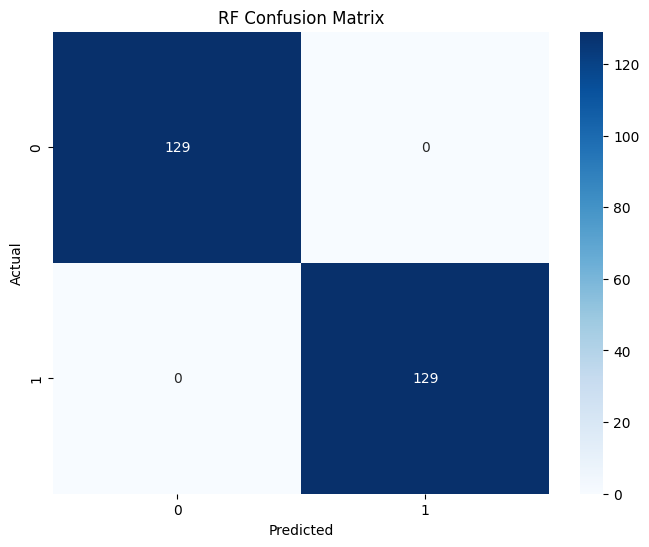

In [72]:
# DATA TRAIN

# Compute values for confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Create display of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Berdasarkan hasil analisis confusion matrix pada data train tersebut, diketahui bahwa dari 129 pasien yang tidak terkena heart disease, sebanyak 129 pasien (total pasien) diprediksi tidak terkena heart disease (TN) dan 0 pasien diprediksi terkena heart disease (FP).
Selanjutnya, dari 129 Pasien yang terkena heart disease, seluruh pasien diprediksi terkena heart disease (TP) dan tidak ada pasien yang diprediksi tidak terkena heart disease (FN)

Dimana:

*   TN : True Negatif (Kasus dimana pasien diprediksi tidak terkena heart disease dan sebenarnya pasien tersebut tidak terkena heart disease)
*   FP : False Positif (Kasus dimana pasien diprediksi terkena heart disease, tetapi pada faktanya pasien tersebut tidak terkena heart disease)
*   FN : False Negatif (Kasus dimana pasien diprediksi tidak terkena heart disease, tetapi pada faktanya pasien tersebut terkena heart disease)
*   TP : True Positif (Kasus dimana pasien diprediksi terkena heart disease dan sebenarnya pasien tersebut terkena heart disease)

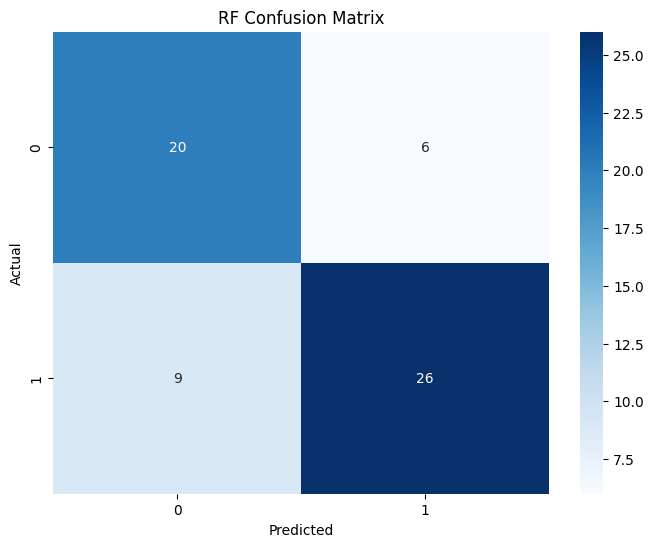

In [73]:
# DATA TEST

# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create display of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Berdasarkan hasil analisis confusion matrix pada data test tersebut, diketahui bahwa dari 26 pasien yang tidak terkena heart disease, sebanyak 20 pasien diprediksi tidak terkena heart disease (TN) dan sisanya yaitu 6 pasien diprediksi terkena heart disease (FP).
Selanjutnya, dari 35 Pasien yang terkena heart disease, sebanyak 26 pasien diprediksi terkena heart disease (TP) dan 9 pasien  diprediksi tidak terkena heart disease (FN)


## Best Model

In [74]:
combined_results = pd.concat([rf_results, XGb_results], ignore_index=True)

# Print the combined table
combined_results

,model,accuracy,precision,recall,F1,AUC
0,Random Forest,0.754098,0.812500,0.742857,0.776119,0.756044
1,XGBoost,0.704918,0.742857,0.742857,0.742857,0.698352


Berdasarkan tabel di atas, dapat diketahui bahwa secara keseluruhan model Random Forest memiliki kinerja yang lebih baik daripada model XGBoost, meskipun XGBoost memiliki presisi yang sedikit lebih tinggi. Walaupun evaluation matrix dari kedua model menunjukkan bahwa mereka dapat bekerja dengan cukup baik untuk mendeteksi heart disease pada data traning.Namun kinerja ini belum tentu optimal maupun efektif karena data yang dianalisis mengalami overfiting.


Dalam kasus overfitting, akurasi tinggi pada model tidak menjamin performa yang baik pada data baru. Selain itu, risiko yang mungkin terjadi yaitu bahwa model telah menangkap noise atau kesalahan dalam data training dan bukan pola yang sebenarnya dalam data, sehingga model memberikan prediksi yang tidak akurat pada data baru.


Saya juga sudah mencoba ketika datanya tidak dibalance, dimana hasil yang diperoleh yaitu nilai matrix evaluations kedua model mengalami peningkatan dengan urutan best model yang sama, yaitu Random Forest lebih baik dibandingkan XGBoost. Selain itu, saya juga telah mencoba ketika datanya tidak dibalance dan tidak dilakukan cleaning data, dimana hasil yang saya peroleh yaitu nilai evaluation matrix untuk kedua model lebih besar dibandingkan ketika datanya hanya tidak dibalance namun tetap dilakukan celaning data (untuk urutan best modelnya tetap sama). Akan tetapi, tetap saja semua percobaan yang telah dilakukan menunjukkan data yang overfiting.

Untuk percobaan dimana balancing data dilakukan tetapi data celaning tidak, menghasilkan nilai evaluation matrix yang lebih kecil dari data ini.